# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
print(tf.__version__)

Using TensorFlow backend.


2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, SimpleRNN, LSTM, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Let's import the dataset


In [0]:
def evaluation_tf(report, y_test, y_pred, classes):
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()
  plt.show()
  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()
  plt.show()


In [6]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                     num_words=None,
                                                     skip_top=0,
                                                     maxlen=None)

17465344/17464789 [==============================] - 0s 0us/step


In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [8]:
print(X_train[np.random.randint(0,len(X_train))])

[1, 86, 125, 14, 66, 9, 61, 514, 22, 126, 13, 92, 359, 8, 202, 259, 6, 2786, 88, 175, 6, 2944, 127, 15, 13, 244, 1227, 2192, 19, 14, 2201, 11823, 954, 835, 302, 60720, 4572, 1231, 61425, 913, 1993, 1355, 2639, 189, 991, 4, 167, 13, 557, 69, 3205, 18, 6, 569, 33, 4, 953, 1052, 38, 15, 29, 100, 81, 2289, 5, 28, 6, 2281, 1655, 552, 7, 855, 18, 309, 1543, 13, 657, 15, 2856, 435, 180, 40, 15, 4, 51216, 81651, 4, 33835, 52, 808, 14, 36581, 46, 5, 101, 783, 254, 451, 46, 50, 235, 879, 8, 9493, 5, 8996, 6115, 62270, 13, 70, 30, 258, 33, 10310]


In [9]:
print(set(y_train))

{0, 1}


In [10]:
V = 5000
tokenizer = Tokenizer(num_words=V)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print(X_train[np.random.randint(0,len(X_train))])

[0. 1. 0. ... 0. 0. 0.]


In [11]:
print(X_train.shape)
print(X_test.shape)

(25000, 5000)
(25000, 5000)


In [12]:
classes = len(set(y_train))
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [13]:
print("tokens = " + str(V))

tokens = 5000


In [0]:
i_layer = Input(shape = (V,))
h_layer = Dense(254, activation='relu')(i_layer)
h_layer = Dropout(0.9)(h_layer)
o_layer = Dense(classes, activation='softmax')(h_layer)

model = Model(i_layer, o_layer)

In [0]:
model.compile(
    optimizer=Adagrad(0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [16]:
report = model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
782/782 [==============================] - 4s 5ms/step - loss: 0.5899 - accuracy: 0.6783 - val_loss: 0.4231 - val_accuracy: 0.8364
Epoch 2/30
782/782 [==============================] - 4s 5ms/step - loss: 0.4481 - accuracy: 0.7916 - val_loss: 0.3602 - val_accuracy: 0.8548
Epoch 3/30
782/782 [==============================] - 4s 5ms/step - loss: 0.3935 - accuracy: 0.8241 - val_loss: 0.3313 - val_accuracy: 0.8631
Epoch 4/30
782/782 [==============================] - 4s 5ms/step - loss: 0.3596 - accuracy: 0.8458 - val_loss: 0.3125 - val_accuracy: 0.8690
Epoch 5/30
782/782 [==============================] - 4s 5ms/step - loss: 0.3410 - accuracy: 0.8556 - val_loss: 0.3052 - val_accuracy: 0.8722
Epoch 6/30
782/782 [==============================] - 4s 5ms/step - loss: 0.3198 - accuracy: 0.8686 - val_loss: 0.2968 - val_accuracy: 0.8756
Epoch 7/30
782/782 [==============================] - 4s 5ms/step - loss: 0.3053 - accuracy: 0.8732 - val_loss: 0.2917 - val_accuracy: 0.8782
Epoch 

In [0]:
y_pred = model.predict(X_test)

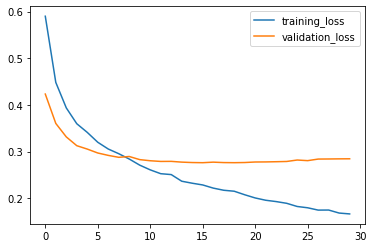

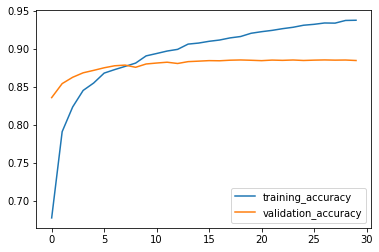

In [20]:
evaluation_tf(report, y_test, y_pred, classes)

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

i_layer = Input(shape = (V,))
h_layer = Dense(254, activation='relu')(i_layer)
h_layer = Dropout(0.9)(h_layer)
o_layer = Dense(classes, activation='softmax')(h_layer)
model = Model(i_layer, o_layer)


model.compile(
    optimizer=Adadelta(0.06),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

report = model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test), callbacks = [callback])



Epoch 1/30
782/782 [==============================] - 4s 5ms/step - loss: 0.7050 - accuracy: 0.5558 - val_loss: 0.6249 - val_accuracy: 0.7505
Epoch 2/30
782/782 [==============================] - 4s 5ms/step - loss: 0.6294 - accuracy: 0.6454 - val_loss: 0.5609 - val_accuracy: 0.7936
Epoch 3/30
782/782 [==============================] - 4s 5ms/step - loss: 0.5758 - accuracy: 0.7042 - val_loss: 0.5006 - val_accuracy: 0.8148
Epoch 4/30
782/782 [==============================] - 4s 5ms/step - loss: 0.5342 - accuracy: 0.7382 - val_loss: 0.4582 - val_accuracy: 0.8273
Epoch 5/30
782/782 [==============================] - 4s 5ms/step - loss: 0.5004 - accuracy: 0.7604 - val_loss: 0.4276 - val_accuracy: 0.8357
Epoch 6/30
782/782 [==============================] - 4s 5ms/step - loss: 0.4702 - accuracy: 0.7811 - val_loss: 0.4032 - val_accuracy: 0.8418
Epoch 7/30
782/782 [==============================] - 4s 5ms/step - loss: 0.4459 - accuracy: 0.7978 - val_loss: 0.3849 - val_accuracy: 0.8468
Epoch 

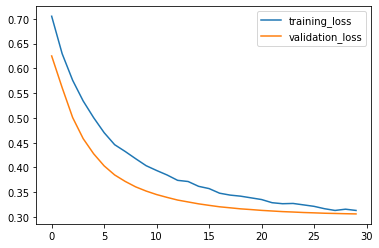

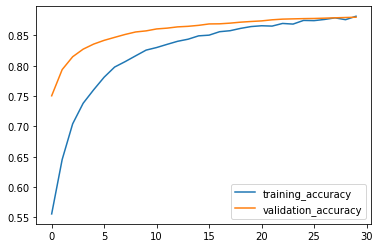

In [26]:
evaluation_tf(report, y_test, y_pred, classes)